In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from scipy.cluster.hierarchy import dendrogram, cut_tree
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from ISLP import load_data
from ISLP.cluster import compute_linkage

c:\Users\admin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
USArrests = get_rdataset('USArrests').data
USArrests.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [6]:
USArrests.mean(), USArrests.var(), USArrests.describe()

(Murder        7.788
 Assault     170.760
 UrbanPop     65.540
 Rape         21.232
 dtype: float64,
 Murder        18.970465
 Assault     6945.165714
 UrbanPop     209.518776
 Rape          87.729159
 dtype: float64,
          Murder     Assault   UrbanPop       Rape
 count  50.00000   50.000000  50.000000  50.000000
 mean    7.78800  170.760000  65.540000  21.232000
 std     4.35551   83.337661  14.474763   9.366385
 min     0.80000   45.000000  32.000000   7.300000
 25%     4.07500  109.000000  54.500000  15.075000
 50%     7.25000  159.000000  66.000000  20.100000
 75%    11.25000  249.000000  77.750000  26.175000
 max    17.40000  337.000000  91.000000  46.000000)

In [9]:
scaler = StandardScaler(with_mean=True, with_std=True)
US_scaled = scaler.fit_transform(USArrests)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [10]:
pcaUS = PCA().fit(US_scaled)

In [11]:
scores = pcaUS.transform(US_scaled)
scores

array([[ 9.85565885e-01,  1.13339238e+00, -4.44268788e-01,
         1.56267145e-01],
       [ 1.95013775e+00,  1.07321326e+00,  2.04000333e+00,
        -4.38583440e-01],
       [ 1.76316354e+00, -7.45956781e-01,  5.47808243e-02,
        -8.34652924e-01],
       [-1.41420290e-01,  1.11979678e+00,  1.14573692e-01,
        -1.82810896e-01],
       [ 2.52398013e+00, -1.54293399e+00,  5.98556799e-01,
        -3.41996478e-01],
       [ 1.51456286e+00, -9.87555085e-01,  1.09500699e+00,
         1.46488703e-03],
       [-1.35864746e+00, -1.08892789e+00, -6.43257569e-01,
        -1.18469414e-01],
       [ 4.77093091e-02, -3.25358925e-01, -7.18632942e-01,
        -8.81977637e-01],
       [ 3.01304227e+00,  3.92285133e-02, -5.76829492e-01,
        -9.62847520e-02],
       [ 1.63928304e+00,  1.27894240e+00, -3.42460080e-01,
         1.07679681e+00],
       [-9.12657146e-01, -1.57046001e+00,  5.07818939e-02,
         9.02806864e-01],
       [-1.63979985e+00,  2.10972917e-01,  2.59801342e-01,
      

In [12]:
pcaUS.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [13]:
pcaUS.explained_variance_, pcaUS.explained_variance_ratio_

(array([2.53085875, 1.00996444, 0.36383998, 0.17696948]),
 array([0.62006039, 0.24744129, 0.0891408 , 0.04335752]))

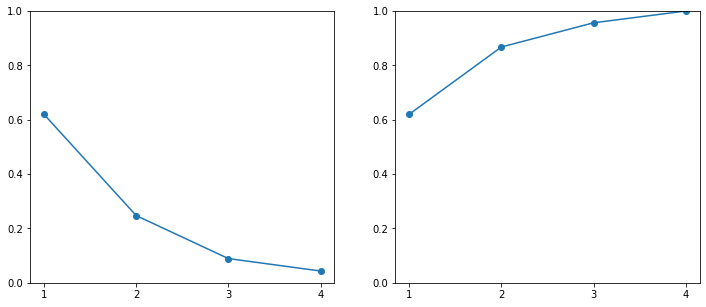

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
ticks = np.arange(pcaUS.n_components_) + 1
ax0 = axs[0]
ax0.plot(ticks, pcaUS.explained_variance_ratio_, marker='o')
ax0.set_ylim([0, 1])
ax0.set_xticks(ticks)
ax1 = axs[1]
ax1.plot(ticks, pcaUS.explained_variance_ratio_.cumsum(), marker='o')
ax1.set_ylim([0, 1])
ax1.set_xticks(ticks)